# **CNN Nedir?**






CNN genellikle resim sınıflandırmak (image classification) için kullanılan bir yapay sinir ağı çeşididir.

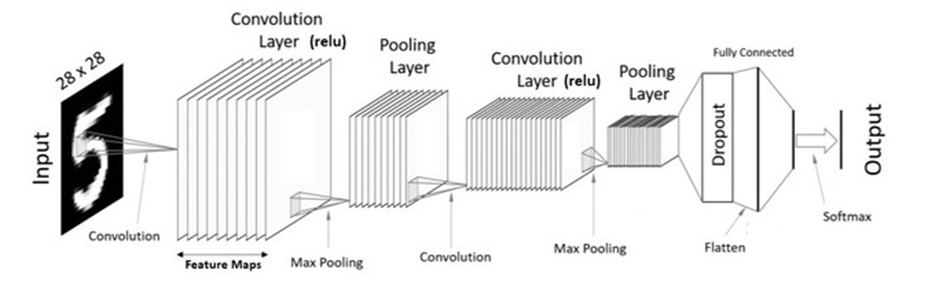





# **Evrişim (Convolution) Nedir?**

** Bazı görüntü ve özellik algılayıcımız var (3 * 3)

** Feature detector (Özellik dedektörü) = kernel = filter

** Özellik dedektörünün* 3'e 3 matris olması gerekmez. 5'e 5 veya 7'ye 7 vb. olabilir.

** Özellik detektörü, kenarlar veya dışbükey şekiller gibi özellikleri algılar. 

** **feature map** = conv(input image, feature detector).

** **feature map** = convolved feature

** **Stride** = giriş görüntüsü üzerinde gezinme.

** Birden çok özellik haritası oluşturuyoruz, bc çoklu özellik algılayıcıları (filtreler) kullanıyoruz.










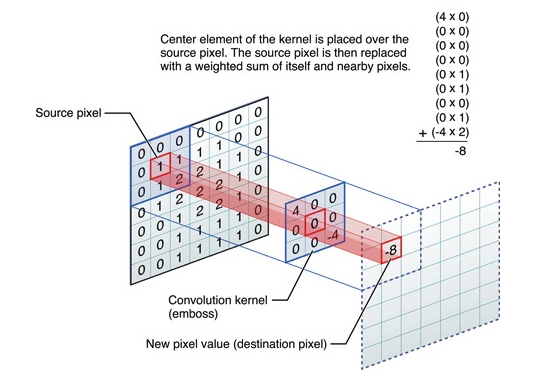

** Evrişim katmanına sahip olduktan sonra, doğrusallığı kırmak için ReLU kullanıyoruz. Doğrusal olmayışı artırın. Çünkü görüntüler doğrusal değildir.

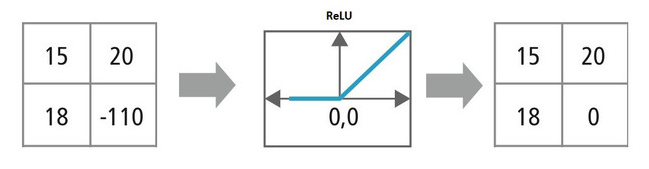

# **Padding**

Evrişimli katmanları uygulamaya devam ettikçe, hacmin boyutu istenenden daha hızlı azalacaktır. 

Ağın ilk katmanlarında, düşük seviyeli özellikleri çıkarabilmemiz için orijinal giriş hacmi hakkında olabildiğince fazla bilgiyi korumak gerekmektedir.


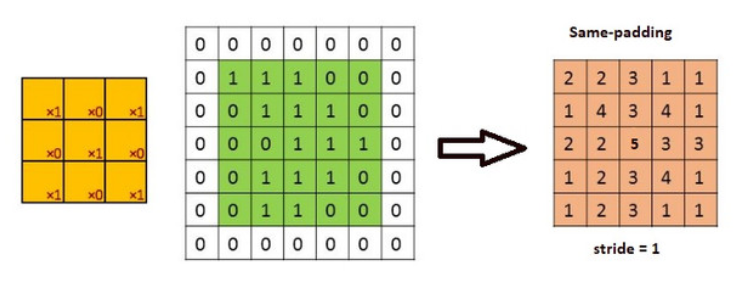

# Pooling

Down sampling veya sub-sampling (Parametre sayısını azaltır)

Ağdaki parametre ve hesaplama miktarını azaltır ve dolayısıyla aşırı uyumu da kontrol eder.

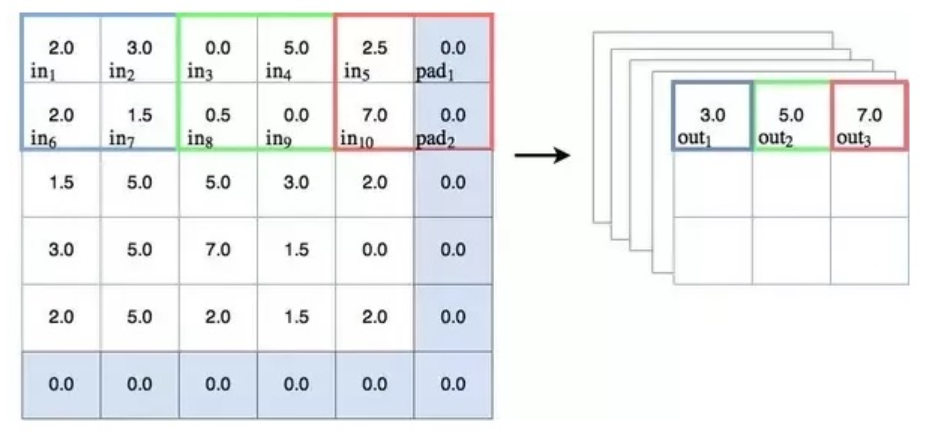

# **Flattening**

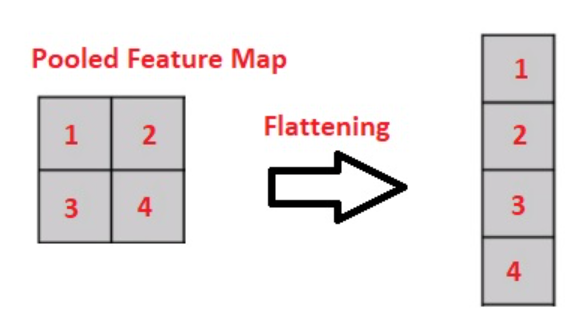

# **Full Connection**

Tamamen bağlı bir katmandaki nöronlar, önceki katmandaki tüm aktivasyonlara bağlantılara sahiptir.

Yapay Sinir Ağı

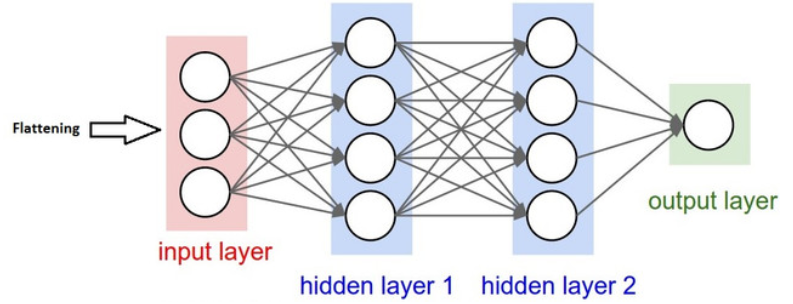

# **Transfer Öğrenme**

Bazı modellerin eğitilmesi, model karmaşıklığı ya da veri setinin büyüklüğü nedeniyle standart bilgisayar işlemcilerinde gerçekleştirmek imkansıza yakındır. Bu yüzden grafik işleme birimlerine ihtiyaç vardır. Günlerce, haftalarca süren eğitimler sonucunda bu eğitilmiş modeller farklı problemlerin çözümü içinde çeşitli şekillerde kullanılabilir. İşte bu duruma ‘Transfer Öğrenme’ denmektedir. 

Transfer öğrenme üç şekilde yapılmaktadır;

-	Tüm modeli dondurup (eğitilebilir parametre=0, freeze=1) softmax çıkışını kendi probleminizin sınıf sayısına göre ayarlayarak,

-	Modelin birkaç katmanını sabit tutup son katmanlarını farklı tutarak,

-	Tüm ağı kendi veri setinizde eğitim için kullanarak (öğrenilebilir parametre =1, freeze=0),


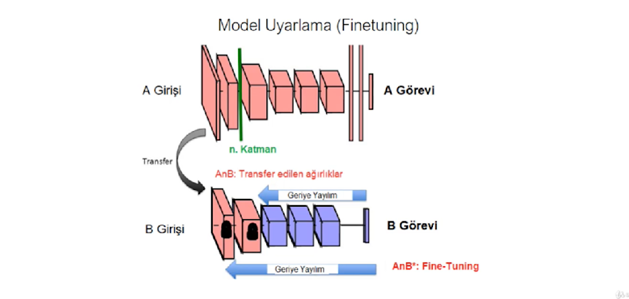

# **Neden Transfer Öğrenme Kullanılmalıdır?**

- **Daha hızlı eğitim süresi:** Önceden eğitilmiş modellerdeki ağırlıklar birçok bilgiyi barındırmaktadır. Dolayısıyla bu bilgileri kullanıp ince ayar(fine-tuning) yapılarak yeni model daha hızlı eğitilir. Hatta bazı problemler için transfer öğrenme kullanılarak 2–4 epochta bile yüksek başarı elde edilebilmektedir.

- **Daha az veri:** Sıfırdan oluşturulan modellerin en büyük dezavantajı eğitim için büyük ölçekli bir veri kümesinin gerekmesidir. Bu veri kümelerinin oluşturulması için ciddi bir zaman gerekir. Bunun yerine önceden eğitilmiş modellere ince ayar yapılması daha az veri kullanarak yüksek performanslar elde edilmesini sağlar.

- **Daha iyi performans:** Önceden eğitilmiş modellere yeni tam bağlantılı katman(lar) eklenerek yapılan basit bir işlemin başarıyı iyileştirdiği görülmektedir.


# ResNet

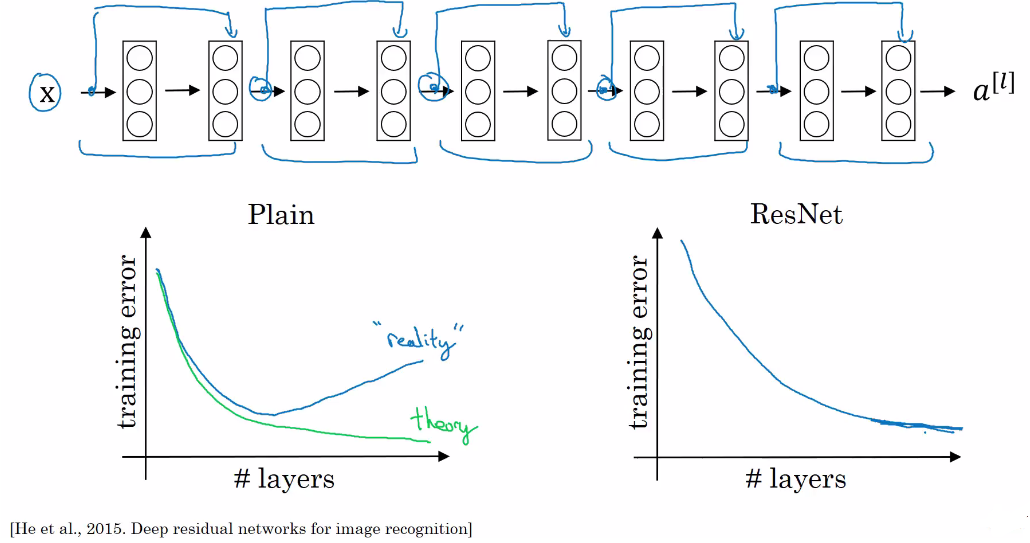

# Eğer CNN Mimarisi Oluşturmak İstersek:

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# Sequential(): Boş bir ileri beslemeli sinir ağı oluşturulur ve ardından çıktı katmanına kadar her seferinde bir katman eklenir. 
# Buna karşı functional api metodunu da kullanabilirsiniz. Bu mimaride katmanlar ayrı ayrı oluşturulur ve ardından birbirlerine bağlanırlar.
model = Sequential() 
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

# **UYGULAMA**

# Import Libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
from skimage import io
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
import os
import glob
import random
from google.colab import files #library to upload files to colab notebook
%matplotlib inline

In [ ]:
# Asagıdaki komutlari kullanarak google drive'a erisim izni almamiz gerekiyor:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# veri kümesinin oldugu dizine gitmek:
%cd /content/drive/My Drive/Colab Notebooks/Healthcare AI/Brain_MRI

/content/drive/My Drive/Colab Notebooks/Healthcare AI/Brain_MRI


In [ ]:
# Beyin MR görüntülerinin yolunu ve bunlara karşılık gelen maskeyi içeren veriyi cekmek:
brain_df = pd.read_csv('data_mask.csv')

In [ ]:
brain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  3929 non-null   object
 1   image_path  3929 non-null   object
 2   mask_path   3929 non-null   object
 3   mask        3929 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 122.9+ KB


In [ ]:
brain_df.head()

,patient_id,image_path,mask_path,mask
0,TCGA_CS_5395_19981004,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...,0
1,TCGA_CS_5395_19981004,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...,0
2,TCGA_CS_5395_19981004,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...,0
3,TCGA_CS_5395_19981004,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...,0
4,TCGA_CS_5395_19981004,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...,0


In [ ]:
# sinif ozniteliginin dagilimi:
brain_df['mask'].value_counts()

0    2556
1    1373
Name: mask, dtype: int64

# Data Visualization

In [ ]:
brain_df['mask'].value_counts().index

Int64Index([0, 1], dtype='int64')

In [ ]:
# Dağılım görselleştirme:
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x = brain_df['mask'].value_counts().index, y = brain_df['mask'].value_counts())])
fig.update_traces(marker_color = 'rgb(0,200,0)', marker_line_color = 'rgb(0,255,0)',
                  marker_line_width = 7, opacity = 0.6)
fig.show()

In [ ]:
brain_df.image_path

0       TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif
1       TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif
2       TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif
3       TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif
4       TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif
                              ...                        
3924    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...
3925    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...
3926    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...
3927    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...
3928    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...
Name: image_path, Length: 3929, dtype: object

In [ ]:
brain_df.mask_path

0       TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...
1       TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...
2       TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...
3       TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...
4       TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...
                              ...                        
3924    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...
3925    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...
3926    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...
3927    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...
3928    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...
Name: mask_path, Length: 3929, dtype: object

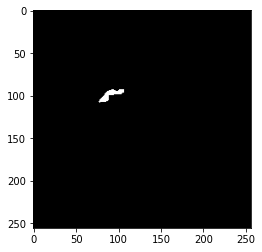

In [ ]:
plt.imshow(cv2.imread(brain_df.mask_path[623]))

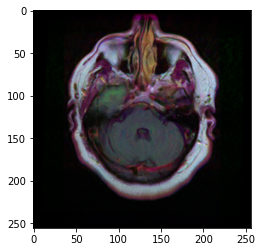

In [ ]:
plt.imshow(cv2.imread(brain_df.image_path[623]))

In [ ]:
cv2.imread(brain_df.mask_path[623]).max()

255

In [ ]:
cv2.imread(brain_df.mask_path[623]).min()

0

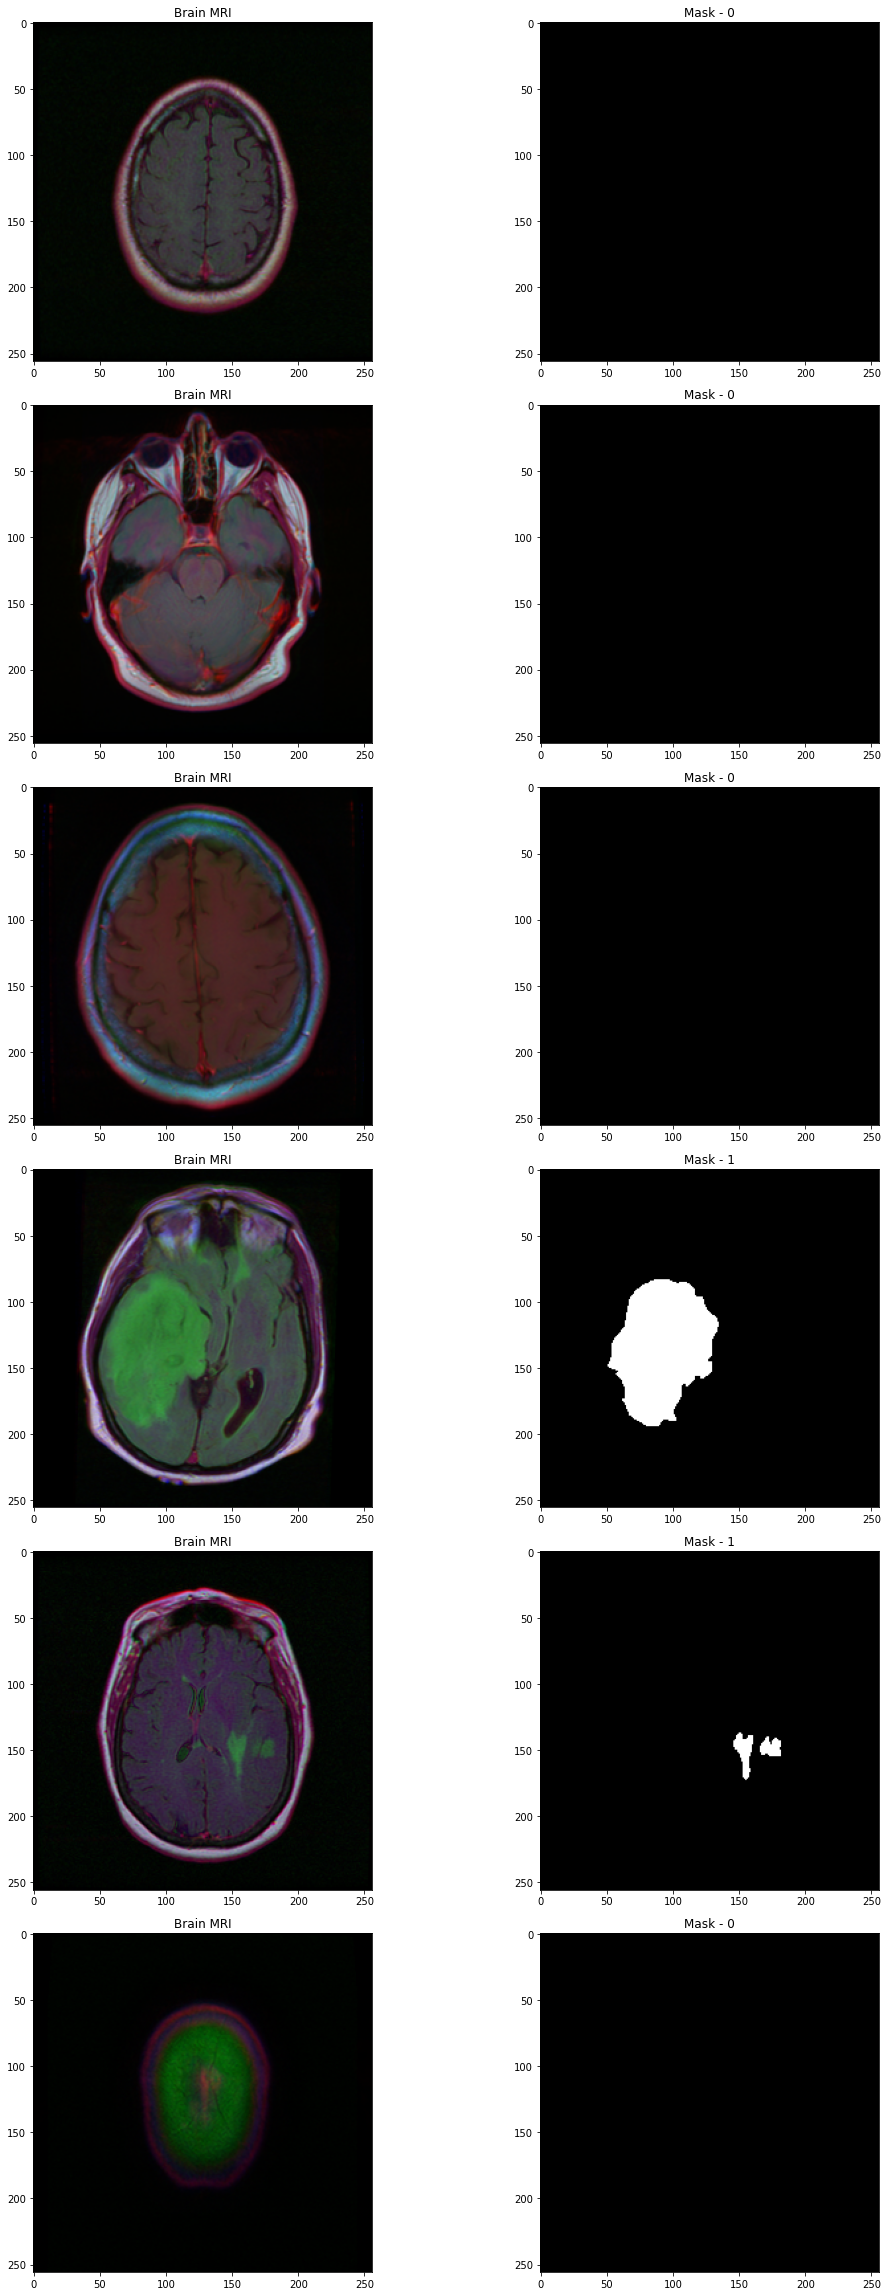

In [ ]:
# Temel görselleştirmeler: Veri kümesindeki görüntüleri (MRI ve Maske) ayrı ayrı görselleştirin
import random
fig, axs = plt.subplots(6,2, figsize=(16,32))
count = 0
for x in range(6):
  i = random.randint(0, len(brain_df)) # rasgele index seçiyoruz
  axs[count][0].title.set_text("Brain MRI") # başlık
  axs[count][0].imshow(cv2.imread(brain_df.image_path[i])) # MR gösterimi 
  axs[count][1].title.set_text("Mask - " + str(brain_df['mask'][i])) # sinif özniteliğinin görüntülenmesiv(0-1)
  axs[count][1].imshow(cv2.imread(brain_df.mask_path[i])) # ilgili maskeyi göster
  count += 1

fig.tight_layout()

# Train a Classifier Model and Detect Tumor

In [ ]:
# patient id sütununu kaldırmak
brain_df_train = brain_df.drop(columns = ['patient_id'])
brain_df_train.shape

(3929, 3)

In [ ]:
# Flow_from_dataframe'de kategorik modu kullanmak için maske sütunundaki verileri string formatına dönüştürün
brain_df_train['mask'] = brain_df_train['mask'].apply(lambda x: str(x))

In [ ]:
brain_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3929 non-null   object
 1   mask_path   3929 non-null   object
 2   mask        3929 non-null   object
dtypes: object(3)
memory usage: 92.2+ KB


In [ ]:
#split data
from sklearn.model_selection import train_test_split

train, test = train_test_split(brain_df_train, test_size = 0.15)

In [ ]:
# image generator oluşturma:
from keras_preprocessing.image import ImageDataGenerator

# Verimizi normalize ediyoruz:
datagen = ImageDataGenerator(rescale=1./255., validation_split = 0.15)

In [ ]:
train_generator=datagen.flow_from_dataframe(
dataframe=train,
directory= './',
x_col='image_path',
y_col='mask',
subset="training",
batch_size=16,
shuffle=True,
class_mode="categorical",
target_size=(256,256))


valid_generator=datagen.flow_from_dataframe(
dataframe=train,
directory= './',
x_col='image_path',
y_col='mask',
subset="validation",
batch_size=16,
shuffle=True,
class_mode="categorical",
target_size=(256,256))

# Create a data generator for test images
test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
dataframe=test,
directory= './',
x_col='image_path',
y_col='mask',
batch_size=16,
shuffle=False,
class_mode='categorical',
target_size=(256,256))


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning:

Found 1 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.



Found 2838 validated image filenames belonging to 2 classes.
Found 500 validated image filenames belonging to 2 classes.
Found 590 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning:

Found 1 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.



In [ ]:
# Get the ResNet50 base model
basemodel = ResNet50(weights = 'imagenet', include_top = False, input_tensor = Input(shape=(256, 256, 3)))

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
# freeze the model weights
for layer in basemodel.layers:
  layers.trainable = False

In [ ]:
headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size = (4,4))(headmodel)
headmodel = Flatten(name= 'flatten')(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)#
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
#headmodel = Dense(256, activation = "relu")(headmodel)
#headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(2, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# compile the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

In [ ]:
# Belirli dönemlerden sonra bile validation loss azalmıyorsa eğitimden çıkmak için erken durdurmayı kullanın (epoch)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# en az validation loss ile en iyi modeli kaydedin
checkpointer = ModelCheckpoint(filepath="classifier-resnet-weights.hdf5", verbose=1, save_best_only=True)

In [ ]:
%%time
history = model.fit(train_generator, steps_per_epoch= train_generator.n // 16, epochs = 10, validation_data= valid_generator, validation_steps= valid_generator.n // 16, callbacks=[checkpointer, earlystopping])

Epoch 1/10
177/177 [==============================] - 484s 3s/step - loss: 0.5076 - accuracy: 0.7910 - val_loss: 0.6288 - val_accuracy: 0.6774

Epoch 00001: val_loss improved from inf to 0.62880, saving model to classifier-resnet-weights.hdf5
Epoch 2/10
177/177 [==============================] - 40s 223ms/step - loss: 0.4186 - accuracy: 0.8027 - val_loss: 0.6310 - val_accuracy: 0.6774

Epoch 00002: val_loss did not improve from 0.62880
Epoch 3/10
177/177 [==============================] - 40s 228ms/step - loss: 0.3458 - accuracy: 0.8498 - val_loss: 0.7036 - val_accuracy: 0.4153

Epoch 00003: val_loss did not improve from 0.62880
Epoch 4/10
177/177 [==============================] - 41s 231ms/step - loss: 0.2998 - accuracy: 0.8675 - val_loss: 0.6752 - val_accuracy: 0.6169

Epoch 00004: val_loss did not improve from 0.62880
Epoch 5/10
177/177 [==============================] - 41s 233ms/step - loss: 0.3089 - accuracy: 0.8686 - val_loss: 0.5880 - val_accuracy: 0.6613

Epoch 00005: val_los

In [ ]:
# save the model architecture to json file for future use

model_json = model.to_json()
with open("model.json","w") as json_file:
  json_file.write(model_json)

In [ ]:
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load json and create model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Assess Trained Model Performance



In [ ]:
# load json and create model
with open('model.json', 'r') as json_file:
    json_savedModel= json_file.read()

model = tf.keras.models.model_from_json(json_savedModel)
model.load_weights('weights.hdf5')
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

In [ ]:
# make prediction

test_predict = model.predict(test_generator, steps = test_generator.n // 16, verbose =1)

36/36 [==============================] - 3s 67ms/step


In [ ]:
test_predict

array([[9.9979872e-01, 2.0128628e-04],
       [9.9482960e-01, 5.1704627e-03],
       [9.9927789e-01, 7.2214135e-04],
       ...,
       [4.9286705e-02, 9.5071328e-01],
       [9.9982172e-01, 1.7831806e-04],
       [9.9999011e-01, 9.8777491e-06]], dtype=float32)

In [ ]:
# Model tahmininden tahmin edilen sınıfı elde edin
predict = []

for i in test_predict:
  predict.append(str(np.argmax(i)))

predict = np.asarray(predict)

In [ ]:
predict

array(['0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1',
       '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0',
       '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0',
       '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1',
       '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0',
       '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0',
       '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0',
       '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0',
       '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1

In [ ]:
# since we have used test generator, it limited the images to len(predict), due to batch size
original = np.asarray(test['mask'])[:len(predict)]
# Obtain the accuracy of the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, predict)
accuracy

0.9774305555555556

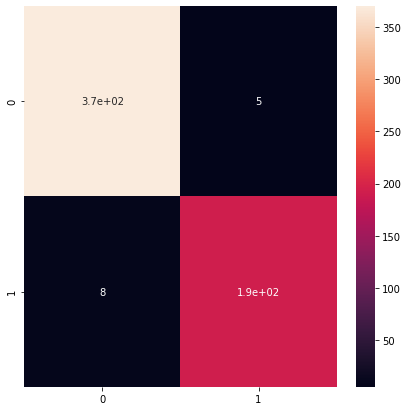

In [ ]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(original, predict)
plt.figure(figsize = (7,7))
sns.heatmap(cm, annot=True)

In [ ]:
cm

array([[370,   5],
       [  8, 193]])

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(original, predict, labels = [0,1])
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       375
           1       0.97      0.96      0.97       201

   micro avg       0.98      0.98      0.98       576
   macro avg       0.98      0.97      0.98       576
weighted avg       0.98      0.98      0.98       576



/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:576: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

